# mice: Multivariate Imputation by Chained Equations in R


In [1]:
# Using airquality dataset
data <- airquality
data[4:10,3] <- rep(NA,7)
data[1:5,4] <- NA

# Removing categorical variables
data <- airquality[-c(5,6)]
summary(data)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       

In [2]:
#-------------------------------------------------------------------------------
# Look for missing > 5% variables
pMiss <- function(x){sum(is.na(x))/length(x)*100}

# Check each column
apply(data,2,pMiss)

# Check each row
apply(data,1,pMiss)

Ozone   Solar.R      Wind      Temp 
24.183007  4.575163  0.000000  0.000000

[1]  0  0  0  0 50 25  0  0  0 25 25  0  0  0  0  0  0  0  0  0  0  0  0  0 25
 [26] 25 50  0  0  0  0 25 25 25 25 25 25  0 25  0  0 25 25  0 25 25  0  0  0  0
 [51]  0 25 25 25 25 25 25 25 25 25 25  0  0  0 25  0  0  0  0  0  0 25  0  0 25
 [76]  0  0  0  0  0  0  0 25 25  0  0  0  0  0  0  0  0  0  0  0 25 25 25  0  0
[101]  0 25 25  0  0  0 25  0  0  0  0  0  0  0 25  0  0  0 25  0  0  0  0  0  0
[126]  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 25
[151]  0  0  0


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




,Wind,Temp,Solar.R,Ozone,
111,1,1,1,1,0
35,1,1,1,0,1
5,1,1,0,1,1
2,1,1,0,0,2
,0,0,7,37,44


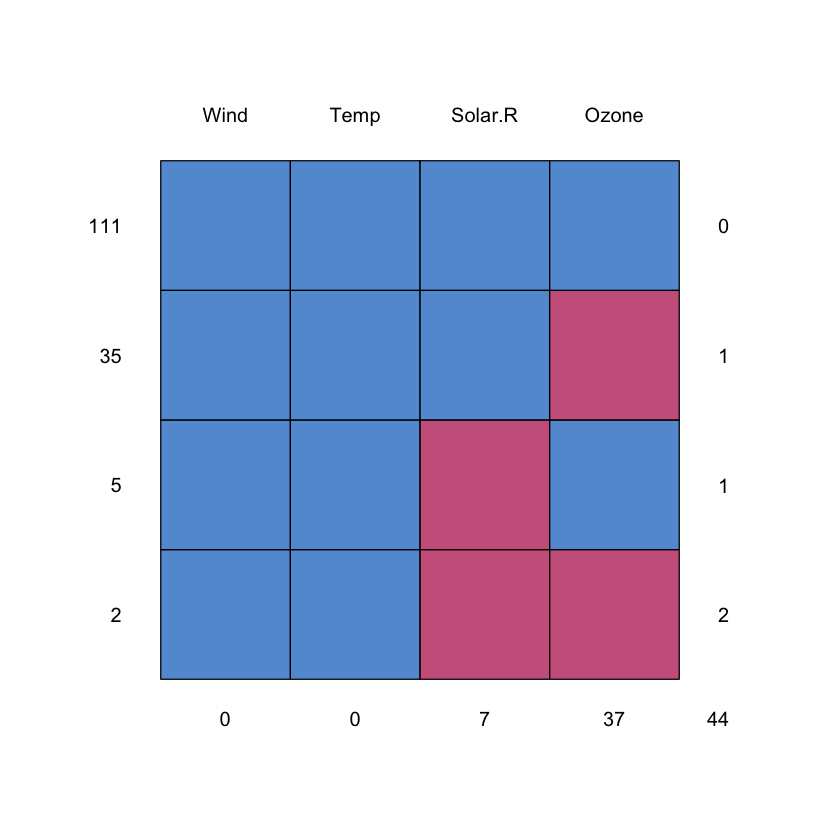

In [3]:
#-------------------------------------------------------------------------------
# Missing data pattern
library(mice)

# Missing data pattern
md.pattern(data)

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep





 Variables sorted by number of missings: 
 Variable      Count
    Ozone 0.24183007
  Solar.R 0.04575163
     Wind 0.00000000
     Temp 0.00000000


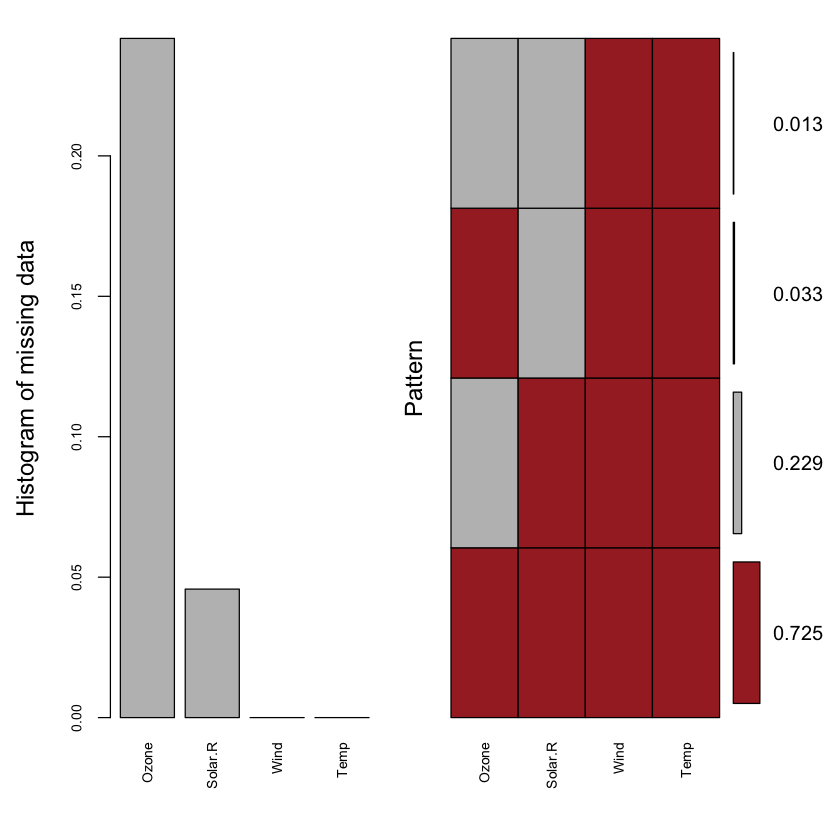

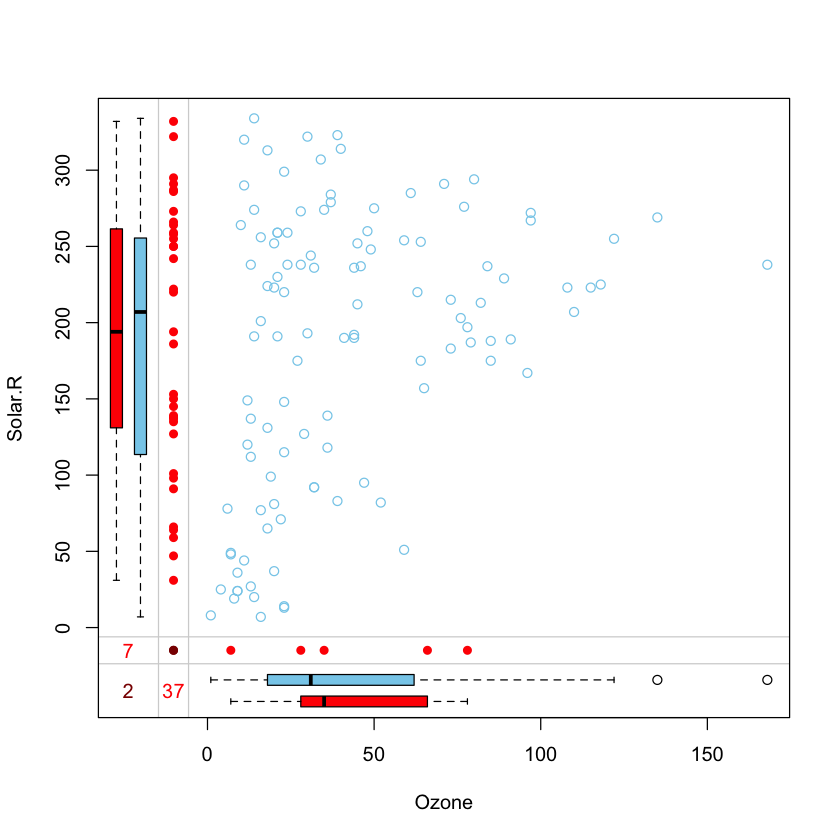

In [4]:
library(VIM)
# Plot of missing data pattern
aggr_plot <- aggr(data, col=c('brown','gray'), numbers=TRUE, sortVars=TRUE, labels=names(data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

# Box plot
marginplot(data[c(1,2)])

In [5]:
#-------------------------------------------------------------------------------
# Impute missing data using mice

tempData <- mice(data,m=5,maxit=50,meth='pmm',seed=500)
summary(tempData)


 iter imp variable
  1   1  Ozone  Solar.R
  1   2  Ozone  Solar.R
  1   3  Ozone  Solar.R
  1   4  Ozone  Solar.R
  1   5  Ozone  Solar.R
  2   1  Ozone  Solar.R
  2   2  Ozone  Solar.R
  2   3  Ozone  Solar.R
  2   4  Ozone  Solar.R
  2   5  Ozone  Solar.R
  3   1  Ozone  Solar.R
  3   2  Ozone  Solar.R
  3   3  Ozone  Solar.R
  3   4  Ozone  Solar.R
  3   5  Ozone  Solar.R
  4   1  Ozone  Solar.R
  4   2  Ozone  Solar.R
  4   3  Ozone  Solar.R
  4   4  Ozone  Solar.R
  4   5  Ozone  Solar.R
  5   1  Ozone  Solar.R
  5   2  Ozone  Solar.R
  5   3  Ozone  Solar.R
  5   4  Ozone  Solar.R
  5   5  Ozone  Solar.R
  6   1  Ozone  Solar.R
  6   2  Ozone  Solar.R
  6   3  Ozone  Solar.R
  6   4  Ozone  Solar.R
  6   5  Ozone  Solar.R
  7   1  Ozone  Solar.R
  7   2  Ozone  Solar.R
  7   3  Ozone  Solar.R
  7   4  Ozone  Solar.R
  7   5  Ozone  Solar.R
  8   1  Ozone  Solar.R
  8   2  Ozone  Solar.R
  8   3  Ozone  Solar.R
  8   4  Ozone  Solar.R
  8   5  Ozone  Solar.R
  9   1  Ozone  Sola

In [6]:
# Get imputed data (for the Ozone variable)
tempData$imp$Ozone

,1,2,3,4,5
,<int>,<int>,<int>,<int>,<int>
5,14,6,32,32,28
10,24,41,20,45,13
25,14,19,19,14,19
26,4,1,19,37,4
27,21,4,19,12,7
32,40,46,36,47,39
33,20,45,13,35,23
34,9,11,11,9,18
35,16,35,44,40,59


In [7]:
# Possible imputation models provided by mice() are
methods(mice)

Warning message in .S3methods(generic.function, class, envir):
“function 'mice' appears not to be S3 generic; found functions that look like S3 methods”


 [1] mice.impute.2l.bin              mice.impute.2l.lmer            
 [3] mice.impute.2l.norm             mice.impute.2l.pan             
 [5] mice.impute.2lonly.mean         mice.impute.2lonly.norm        
 [7] mice.impute.2lonly.pmm          mice.impute.cart               
 [9] mice.impute.jomoImpute          mice.impute.lasso.logreg       
[11] mice.impute.lasso.norm          mice.impute.lasso.select.logreg
[13] mice.impute.lasso.select.norm   mice.impute.lda                
[15] mice.impute.logreg              mice.impute.logreg.boot        
[17] mice.impute.mean                mice.impute.midastouch         
[19] mice.impute.mnar.logreg         mice.impute.mnar.norm          
[21] mice.impute.mpmm                mice.impute.norm               
[23] mice.impute.norm.boot           mice.impute.norm.nob           
[25] mice.impute.norm.predict        mice.impute.panImpute          
[27] mice.impute.passive             mice.impute.pmm                
[29] mice.impute.polr             

In [8]:
# Get completed datasets (observed and imputed)
completedData <- complete(tempData,1)
summary(completedData)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:101.0   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 32.00   Median :194.0   Median : 9.700   Median :79.00  
 Mean   : 43.17   Mean   :181.4   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 61.00   3rd Qu.:256.0   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  

**Inspecting the distribution of original and imputed data**


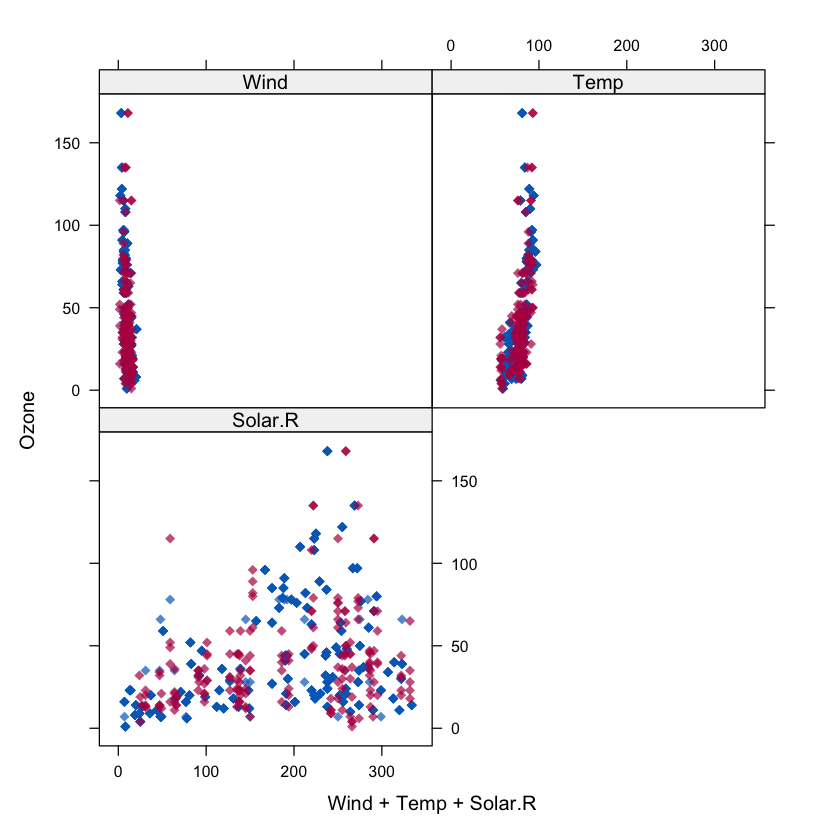

In [9]:
#-------------------------------------------------------------------------------
# Plots

# Scatterplot Ozone vs all
xyplot(tempData,Ozone ~ Wind+Temp+Solar.R,pch=18,cex=1)


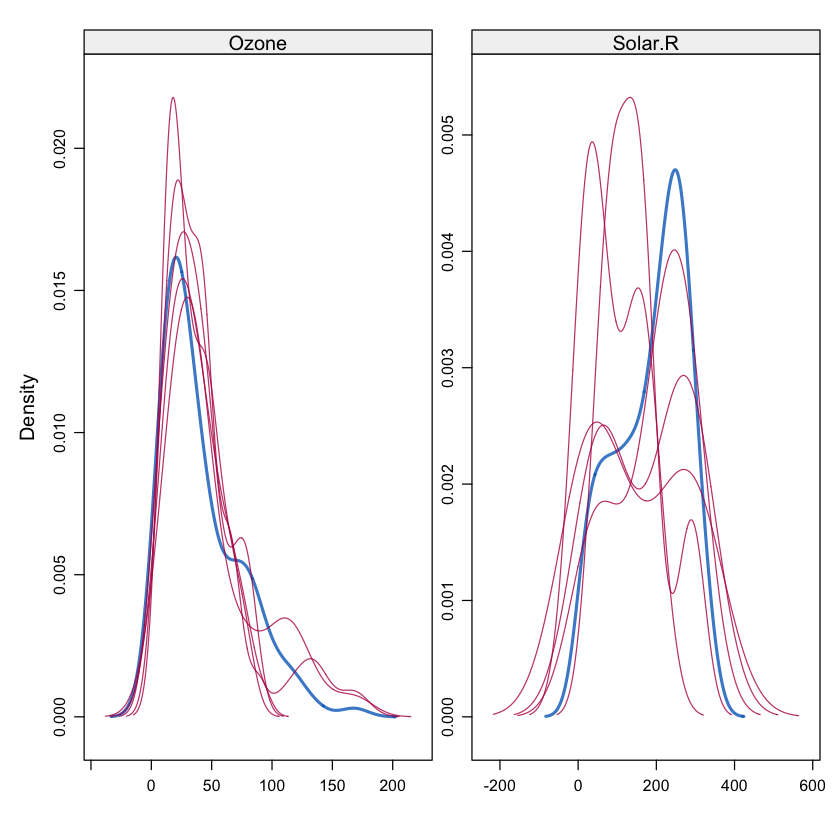

In [10]:
# Density plot original vs imputed dataset
densityplot(tempData)


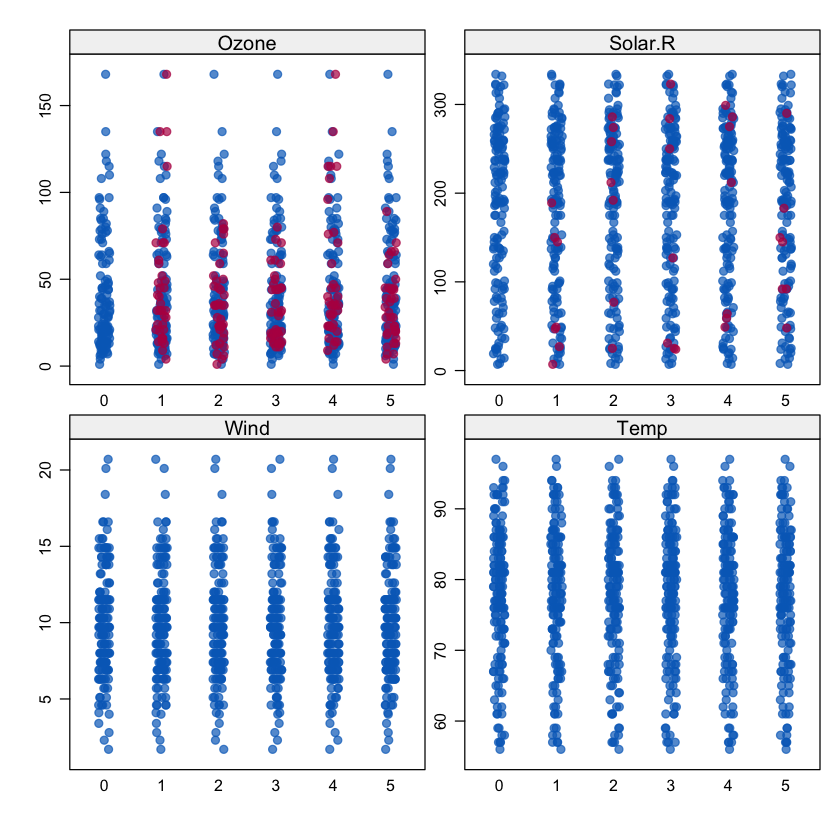

In [11]:
# Another take on the density: stripplot()
stripplot(tempData, pch = 20, cex = 1.2)

In [12]:
#-------------------------------------------------------------------------------
# Pooling the results and fitting a linear model

modelFit1 <- with(tempData,lm(Temp ~ Ozone+Solar.R+Wind))


In [13]:
#pool(modelFit1)
#summary(pool(modelFit1))

In [14]:
# Using more imputed datasets
tempData2 <- mice(data,m=50,seed=245435)
modelFit2 <- with(tempData2,lm(Temp~ Ozone+Solar.R+Wind))
summary(pool(modelFit2))




 iter imp variable
  1   1  Ozone  Solar.R
  1   2  Ozone  Solar.R
  1   3  Ozone  Solar.R
  1   4  Ozone  Solar.R
  1   5  Ozone  Solar.R
  1   6  Ozone  Solar.R
  1   7  Ozone  Solar.R
  1   8  Ozone  Solar.R
  1   9  Ozone  Solar.R
  1   10  Ozone  Solar.R
  1   11  Ozone  Solar.R
  1   12  Ozone  Solar.R
  1   13  Ozone  Solar.R
  1   14  Ozone  Solar.R
  1   15  Ozone  Solar.R
  1   16  Ozone  Solar.R
  1   17  Ozone  Solar.R
  1   18  Ozone  Solar.R
  1   19  Ozone  Solar.R
  1   20  Ozone  Solar.R
  1   21  Ozone  Solar.R
  1   22  Ozone  Solar.R
  1   23  Ozone  Solar.R
  1   24  Ozone  Solar.R
  1   25  Ozone  Solar.R
  1   26  Ozone  Solar.R
  1   27  Ozone  Solar.R
  1   28  Ozone  Solar.R
  1   29  Ozone  Solar.R
  1   30  Ozone  Solar.R
  1   31  Ozone  Solar.R
  1   32  Ozone  Solar.R
  1   33  Ozone  Solar.R
  1   34  Ozone  Solar.R
  1   35  Ozone  Solar.R
  1   36  Ozone  Solar.R
  1   37  Ozone  Solar.R
  1   38  Ozone  Solar.R
  1   39  Ozone  Solar.R
  1   40  Ozon

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),73.294825791,2.735446673,26.794463,134.2649,9.872011e-56
Ozone,0.165199383,0.025069645,6.589618,108.8264,1.625733e-09
Solar.R,0.009028981,0.007315912,1.234157,113.8874,2.196852e-01
Wind,-0.392650779,0.200839151,-1.955051,136.7577,5.261643e-02
